In [23]:
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.python.summary import summary_iterator

def extract_scalars_from_event_file(event_file):
    scalars = {}
    for event in summary_iterator.summary_iterator(event_file):
        for value in event.summary.value:
            if value.HasField('simple_value'):
                if value.tag not in scalars:
                    scalars[value.tag] = []
                scalars[value.tag].append(value.simple_value)
    return scalars



fold_metrics = {}

for event_file_path in Path('LUNA/arm2').glob('**/events.out.tfevents.*'):

    arm = 'arm2'
    fold = event_file_path.parts[-2]

    event_file = event_file_path.as_posix()
    fold_metrics[fold] = pd.DataFrame.from_dict(extract_scalars_from_event_file(event_file), orient='index').T




In [34]:
fold_metrics['luna_fold1'].columns

Index(['train_loss', 'avg_train_loss', 'avg_train_cls_loss',
       'avg_train_box_reg_loss', 'train_lr',
       'val_mAP_IoU_0.10_0.50_0.05_MaxDet_100',
       'val_nodule_mAP_IoU_0.10_0.50_0.05_MaxDet_100',
       'val_AP_IoU_0.10_MaxDet_100', 'val_nodule_AP_IoU_0.10_MaxDet_100',
       'val_mAR_IoU_0.10_0.50_0.05_MaxDet_100',
       'val_nodule_mAR_IoU_0.10_0.50_0.05_MaxDet_100',
       'val_AR_IoU_0.10_MaxDet_100', 'val_nodule_AR_IoU_0.10_MaxDet_100',
       'val_metric'],
      dtype='object')

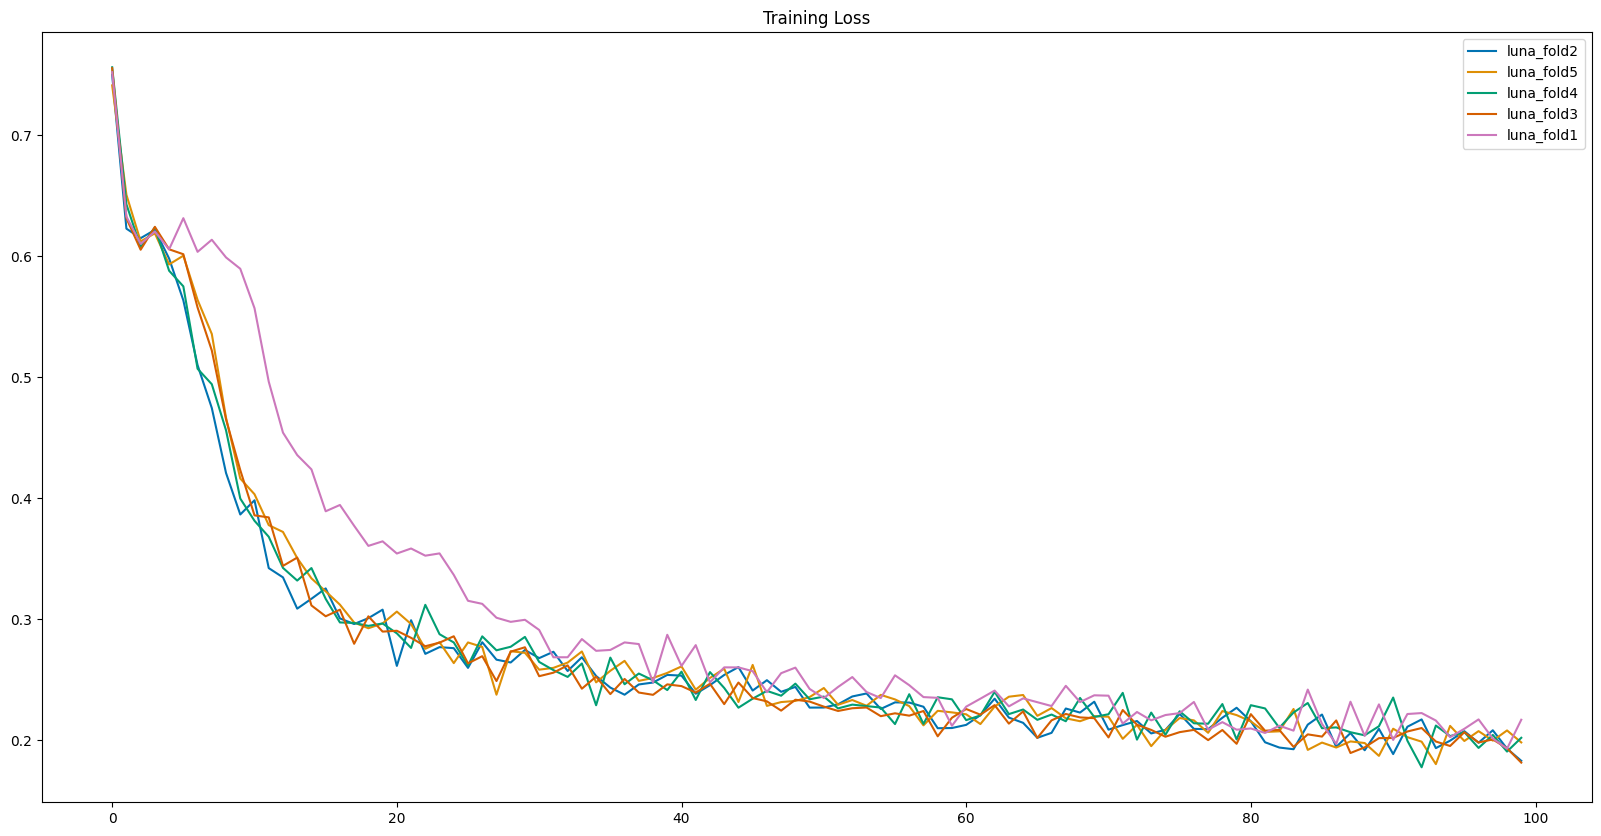

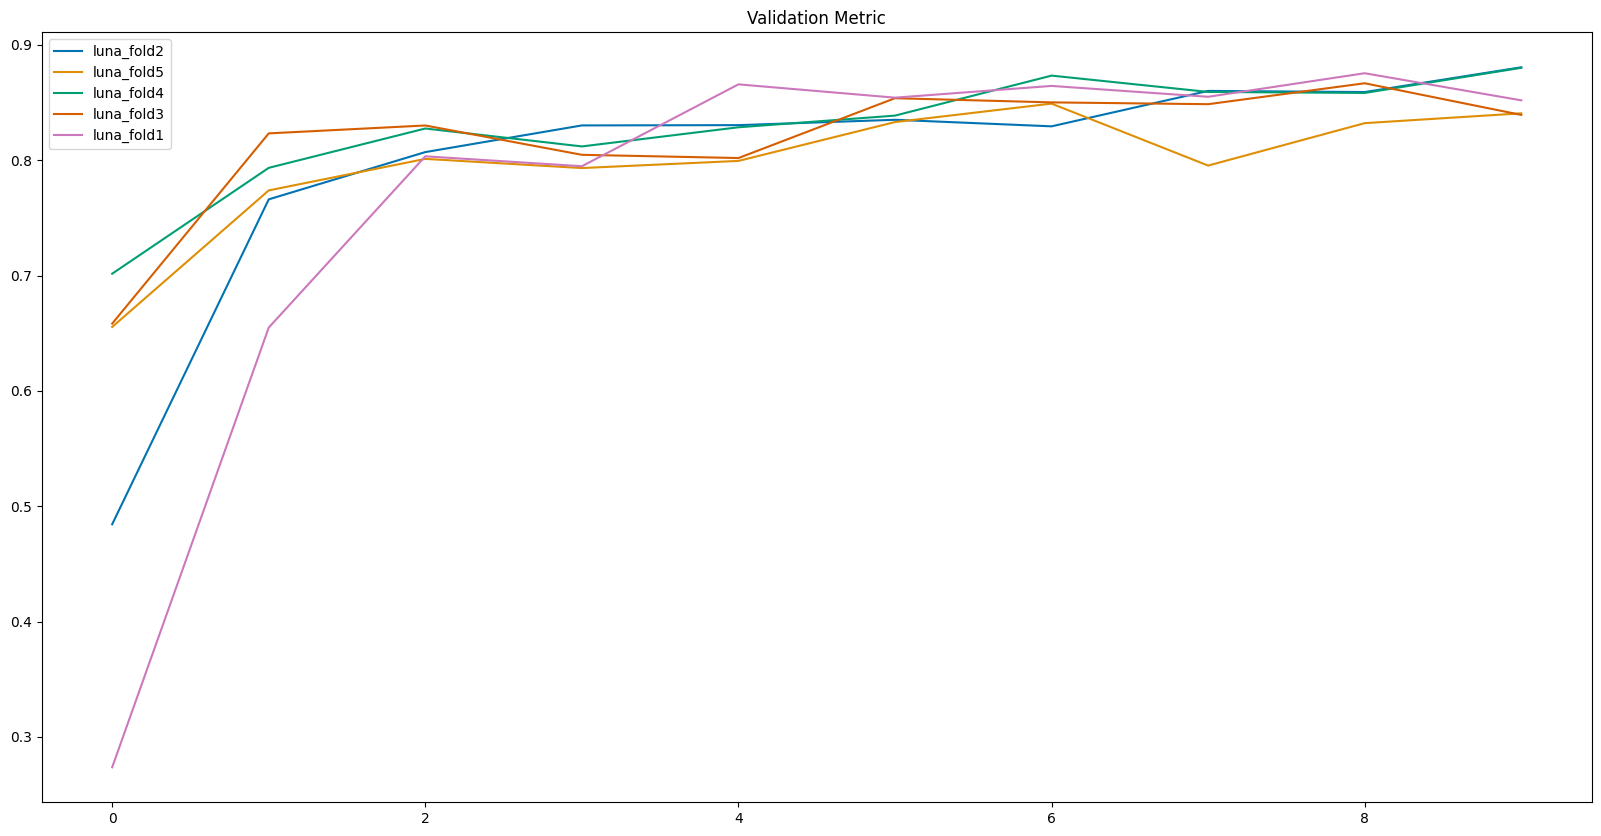

,fold1,fold2,fold3,fold4,fold5
0,0.273666,0.484334,0.658297,0.701555,0.655389
1,0.654841,0.766022,0.823210,0.793331,0.773767
2,0.803333,0.806993,0.830061,0.827437,0.801101
3,0.794731,0.830113,0.804631,0.811897,0.793155
4,0.865715,0.830356,0.801834,0.828500,0.799347
5,0.854175,0.834990,0.853703,0.838618,0.833034
6,0.864355,0.829319,0.850081,0.873294,0.849016
7,0.854935,0.860025,0.848525,0.859152,0.795296
8,0.875356,0.859040,0.866662,0.858262,0.832081
9,0.851857,0.880518,0.839236,0.880053,0.840607


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_training_data(fold_metrics):


    # Generate a colorblind-friendly palette with 5 colors
    color_palette = sns.color_palette("colorblind", 5)

    fig, ax = plt.subplots(1, 1, figsize=(20, 10))    
    for idx, (fold, data) in enumerate(fold_metrics.items()):

        ax.plot(data['avg_train_loss'], label=fold, color=color_palette[idx])
        ax.set_title('Training Loss')
        ax.legend()

    plt.show()


    
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    for idx, (fold, data) in enumerate(fold_metrics.items()):
        ax.plot(data['val_metric'], label=fold, color=color_palette[idx])
        ax.set_title('Validation Metric')
        ax.legend()
    
    plt.show()

    
plot_training_data(fold_metrics)
d = [fold_metrics['luna_fold1']['val_metric'].values, fold_metrics['luna_fold2']['val_metric'].values, fold_metrics['luna_fold3']['val_metric'].values, fold_metrics['luna_fold4']['val_metric'].values, fold_metrics['luna_fold5']['val_metric'].values]
d = pd.DataFrame(d).T.rename(columns={0:'fold1',1:'fold2',2:'fold3',3:'fold4',4:'fold5'}).head(10)
d